# Isha|n>'s Intro To Python Data Science for FRC

Hello nerds, so you want to learn how to use python to manage and analyse FRC data? Good idea! Lets get started!

## Part 1: Setting up your note book
This first cell just imports the neeceary libraires for our code

- Pandas is a library that will help us deal with tables, Comma Seperated Value file (CSVs) and data frames

- Matplotlib will allow us to make plots and graphs

- Numpy lets us do math more easily and also allows for an altertive ways to create arrays and matrixes

In [1]:
import pandas as pd #when we import as, were creating a new simpler name we can use to call the library. 
import matplotlib.pyplot as plt #Libraries tend to have their own standerdised shorthands, dont make up your own
import numpy as np


## Part 2: Understanding DataFrames

#### Before we get too far into messing with our new dataframe, we should perhaps understand the structure of a pandas data frame. 

#### Lets say we had we surveyd 3 cats and asked them their name, species, and favourite FRC teams. We could store each response in an array.

In [2]:
# create array of cat names

catName = ['Rupert',"Chester", "Lenny"]

# create array of cat species

catSpecies = ['Lynx Lynx','Acinonyx Jubatus','Lynx Canadensis']

# create array of cat's fav teams

catFavTeam = ['ChainLynx','Jack-in-the-Bot','ChainLynx']

**Now let's say we want to print all the responses from the first respondent. we'd have to call the 0th index which corresponds to the first entry.**

In [3]:
print(catName)

['Rupert', 'Chester', 'Lenny']


**We can then combine them do something like this:**

In [4]:
print(f"Name: {catName[0]}, Species: {catSpecies[0]}, Favourite FRC Team: {catFavTeam[0]}")# this is a f print, it allows special formatting with using clunky seprators to make your print statment.

Name: Rupert, Species: Lynx Lynx, Favourite FRC Team: ChainLynx


**NumPy arrays are faster and more compact than Python lists. An numpy array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further. While the benefits are neglible at the scale of this example, they will be benefitial as we scale up.**

In [5]:
# Method 1: Converting lists into numpy arrays
catName_np = np.array(catName)
catFavTeam_np = np.array(catFavTeam)

# Method 2: Converting lists into numpy arrays
catSpecies_np = np.array(['Lynx Lynx','Acinonyx Jubatus','Lynx Canadensis'])

# Stack arrays horizontally to make a single np matrix
catMatrix = np.column_stack((catName_np, catSpecies_np, catFavTeam_np))

print("Cat Matrix:")
display(catMatrix)

Cat Matrix:


array([['Rupert', 'Lynx Lynx', 'ChainLynx'],
       ['Chester', 'Acinonyx Jubatus', 'Jack-in-the-Bot'],
       ['Lenny', 'Lynx Canadensis', 'ChainLynx']], dtype='<U16')

**DataFrames are even better, becuase we can store heterogeneous data types. Each column can be represented as a different data type. In the case of NumPy arrays, one single data type is associated with the array, making it a homogenous data type. Here are three diffrent ways of combining our data into dataframes. Notice how they all create identical dataframes.**

In [6]:
# creating a dataframe
catDFV1= pd.DataFrame({'Name': ['Rupert',"Chester", "Lenny"], 'Species': ['Lynx Lynx','Acinonyx Jubatus','Lynx Canadensis'], 'Favourite FRC Team': ['ChainLynx','Jack-in-the-Bot','ChainLynx']})
catDFV2= pd.DataFrame({'Name': catName, 'Species': catSpecies_np, 'Favourite FRC Team': catFavTeam})
catDFV3= pd.DataFrame(data = catMatrix, columns=['Name', 'Species','Favourite FRC Team'])

# displaying the dataframe
display(catDFV1) #note how we use display instead of print
display(catDFV2) 
display(catDFV3) 

,Name,Species,Favourite FRC Team
0,Rupert,Lynx Lynx,ChainLynx
1,Chester,Acinonyx Jubatus,Jack-in-the-Bot
2,Lenny,Lynx Canadensis,ChainLynx


,Name,Species,Favourite FRC Team
0,Rupert,Lynx Lynx,ChainLynx
1,Chester,Acinonyx Jubatus,Jack-in-the-Bot
2,Lenny,Lynx Canadensis,ChainLynx


,Name,Species,Favourite FRC Team
0,Rupert,Lynx Lynx,ChainLynx
1,Chester,Acinonyx Jubatus,Jack-in-the-Bot
2,Lenny,Lynx Canadensis,ChainLynx


## Part 3: Plotting with DataFrame

**Ok now lets say we wanted to plot a histogram of what the most common favourite team was. A histogram is a graphical representation of continous data where the area of each bar correlates to frequency of occurence.**

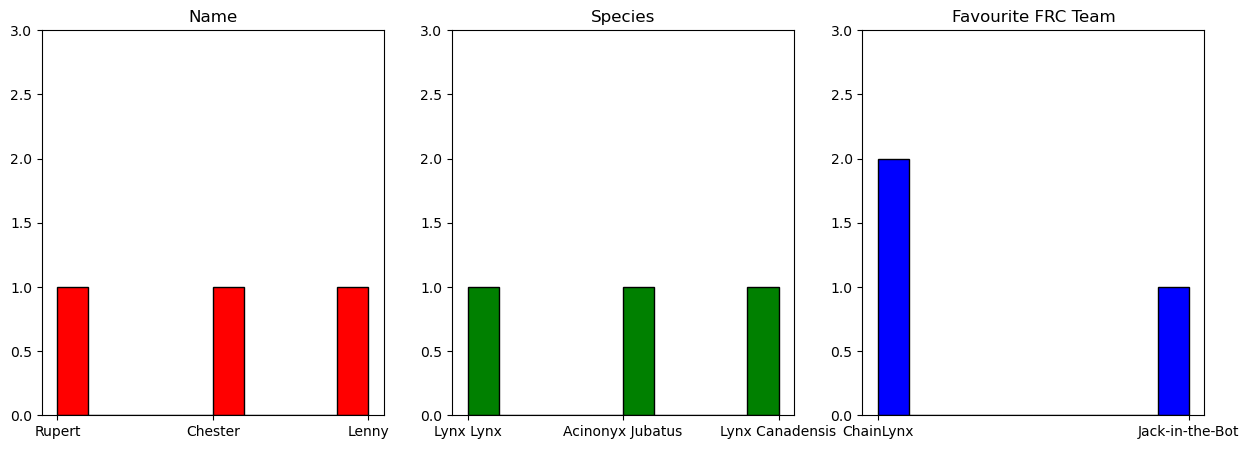

In [7]:
# Create 1x3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for 'Name'
axs[0].hist(catDFV3['Name'], color='r', edgecolor='black')
axs[0].set_ylim(0,3) #setting the ylim helps us standerdise the size of our plots for comparison 
axs[0].set_title('Name')

# Plot histogram for 'Species'
axs[1].hist(catDFV3['Species'], color='g', edgecolor='black')
axs[1].set_ylim(0,3)
axs[1].set_title('Species')

# Plot histogram for 'Favourite FRC Team'
axs[2].hist(catDFV3['Favourite FRC Team'], color='b', edgecolor='black')
axs[2].set_ylim(0,3)
axs[2].set_title('Favourite FRC Team')

# Show the plot
plt.show()


## Part 4: Data Frame operations

In [ ]:
TBD

## Part 5 Fun with data
Im going to assume you've already converted data into a CSV. If not get your spreadsheet, it should be File>>Download>>CSV.

In [8]:
masterScoutingDF = pd.read_csv('ScoutingFRCFiles/MasterScoutingData3.csv') 

display(masterScoutingDF)
PSEFsYears =[2018,2019,2020,2022,2023,2024]
for year in PSEFsYears:
    if year > 2020:
        name = str(year) +' PSEFS (initial)'
    if year < 2021:
        name = str(year) +' retro-PSEFS'
    masterScoutingDF[name] = masterScoutingDF[name].str.replace('-','10')
    masterScoutingDF[name] = masterScoutingDF[name].str.replace('Null','9')
    masterScoutingDF[name] = masterScoutingDF[name].astype('int64')
display(masterScoutingDF)

,Name,#,Standard,2018 retro-PSEFS,2019 retro-PSEFS,2020 retro-PSEFS,2022 PSEFS (initial),2023 PSEFS (initial),2024 PSEFS (initial),Rookie Year,Last Registered Season,Years Competed,Encountered?,Verified by:,Date Last Verified ),Signature (Lead Only),Sign Off Date,Notes
0,The Revolution,360,NaN,2,2,3,2,2,2,2000,2024,25,Y,adonis,10/26/23,NaN,NaN,NaN
1,Team XBOT,488,NaN,1,1,2,1,1,1,2000,2024,25,Y,isha,10/28/23,NaN,NaN,NaN
2,Titan Robotics Club,492,NaN,3,2,3,2,2,2,2001,2024,24,Y,adonis,10/27/23,NaN,NaN,NaN
3,Nerds of the North,568,NaN,-,-,-,2,2,2,2001,2024,24,N,NaN,NaN,NaN,NaN,NaN
4,High Desert Droids,753,NaN,-,-,-,3,3,3,2002,2024,23,Y,NaN,NaN,NaN,NaN,"check, 2024 could be 2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Wolf Tech Robotics,8896,Y,Null,Null,Null,4,5,5,2022,2024,3,Y,NaN,NaN,NaN,NaN,NaN
152,Future Martians,9023,NaN,Null,Null,Null,Null,3,1,2023,2024,2,Y,NaN,NaN,NaN,NaN,NaN
153,Ramen Robotics,9036,NaN,Null,Null,Null,Null,3,3,2023,2024,2,Y,NaN,NaN,NaN,NaN,NaN
154,Miso Mechanics,9442,NaN,Null,Null,Null,Null,Null,3,2024,2024,1,Y,NaN,NaN,NaN,NaN,rookie year 2024


,Name,#,Standard,2018 retro-PSEFS,2019 retro-PSEFS,2020 retro-PSEFS,2022 PSEFS (initial),2023 PSEFS (initial),2024 PSEFS (initial),Rookie Year,Last Registered Season,Years Competed,Encountered?,Verified by:,Date Last Verified ),Signature (Lead Only),Sign Off Date,Notes
0,The Revolution,360,NaN,2,2,3,2,2,2,2000,2024,25,Y,adonis,10/26/23,NaN,NaN,NaN
1,Team XBOT,488,NaN,1,1,2,1,1,1,2000,2024,25,Y,isha,10/28/23,NaN,NaN,NaN
2,Titan Robotics Club,492,NaN,3,2,3,2,2,2,2001,2024,24,Y,adonis,10/27/23,NaN,NaN,NaN
3,Nerds of the North,568,NaN,10,10,10,2,2,2,2001,2024,24,N,NaN,NaN,NaN,NaN,NaN
4,High Desert Droids,753,NaN,10,10,10,3,3,3,2002,2024,23,Y,NaN,NaN,NaN,NaN,"check, 2024 could be 2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Wolf Tech Robotics,8896,Y,9,9,9,4,5,5,2022,2024,3,Y,NaN,NaN,NaN,NaN,NaN
152,Future Martians,9023,NaN,9,9,9,9,3,1,2023,2024,2,Y,NaN,NaN,NaN,NaN,NaN
153,Ramen Robotics,9036,NaN,9,9,9,9,3,3,2023,2024,2,Y,NaN,NaN,NaN,NaN,NaN
154,Miso Mechanics,9442,NaN,9,9,9,9,9,3,2024,2024,1,Y,NaN,NaN,NaN,NaN,rookie year 2024


,Name,#,Standard,2018 retro-PSEFS,2019 retro-PSEFS,2020 retro-PSEFS,2022 PSEFS (initial),2023 PSEFS (initial),2024 PSEFS (initial),Rookie Year,Last Registered Season,Years Competed,Encountered?,Verified by:,Date Last Verified ),Signature (Lead Only),Sign Off Date,Notes
0,The Revolution,360,NaN,2,2,3,2,2,2,2000,2024,25,Y,adonis,10/26/23,NaN,NaN,NaN
1,Team XBOT,488,NaN,1,1,2,1,1,1,2000,2024,25,Y,isha,10/28/23,NaN,NaN,NaN
2,Titan Robotics Club,492,NaN,3,2,3,2,2,2,2001,2024,24,Y,adonis,10/27/23,NaN,NaN,NaN
3,Nerds of the North,568,NaN,10,10,10,2,2,2,2001,2024,24,N,NaN,NaN,NaN,NaN,NaN
4,High Desert Droids,753,NaN,10,10,10,3,3,3,2002,2024,23,Y,NaN,NaN,NaN,NaN,"check, 2024 could be 2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Wolf Tech Robotics,8896,Y,9,9,9,4,5,5,2022,2024,3,Y,NaN,NaN,NaN,NaN,NaN
152,Future Martians,9023,NaN,9,9,9,9,3,1,2023,2024,2,Y,NaN,NaN,NaN,NaN,NaN
153,Ramen Robotics,9036,NaN,9,9,9,9,3,3,2023,2024,2,Y,NaN,NaN,NaN,NaN,NaN
154,Miso Mechanics,9442,NaN,9,9,9,9,9,3,2024,2024,1,Y,NaN,NaN,NaN,NaN,rookie year 2024


,Name,#,Standard,2018 retro-PSEFS,2019 retro-PSEFS,2020 retro-PSEFS,2022 PSEFS (initial),2023 PSEFS (initial),2024 PSEFS (initial),Rookie Year,Last Registered Season,Years Competed,Encountered?,Verified by:,Date Last Verified ),Signature (Lead Only),Sign Off Date,Notes
0,The Revolution,360,NaN,2,2,3,2,2,2,2000,2024,25,Y,adonis,10/26/23,NaN,NaN,NaN
1,Team XBOT,488,NaN,1,1,2,1,1,1,2000,2024,25,Y,isha,10/28/23,NaN,NaN,NaN
2,Titan Robotics Club,492,NaN,3,2,3,2,2,2,2001,2024,24,Y,adonis,10/27/23,NaN,NaN,NaN
7,Wolverine Robotics,949,Y,3,3,3,3,3,3,2002,2024,23,Y,Isha,10/26/23,NaN,NaN,NaN
11,Seabot,1258,NaN,4,4,3,6,6,6,2004,2022,19,Y,NaN,NaN,NaN,NaN,Verify pre covids
12,Pack of Parts,1294,NaN,2,3,3,3,3,3,2004,2024,21,Y,Ishan,10/26/23,NaN,NaN,Verify pre covids
13,Issaquah Robotics Society,1318,Y,1,1,1,1,1,1,2004,2024,21,Y,Isha,10/26/23,NaN,NaN,NaN
43,Jack in the Bot,2910,Y,1,1,1,1,1,1,2009,2024,16,Y,Ishan,10/26/23,NaN,NaN,NaN
77,"Sequim Robotics Federation ""SRF""",3826,NaN,2,2,2,3,3,3,2011,2024,14,Y,NaN,NaN,NaN,NaN,Verify pre covids
90,Iron Riders,4180,Y,3,3,3,3,3,4,2012,2024,13,Y,Isha,10/27/23,NaN,NaN,NaN


Text(0.5, 1.0, '2022 PSEFS vs 2024 PSEFS')

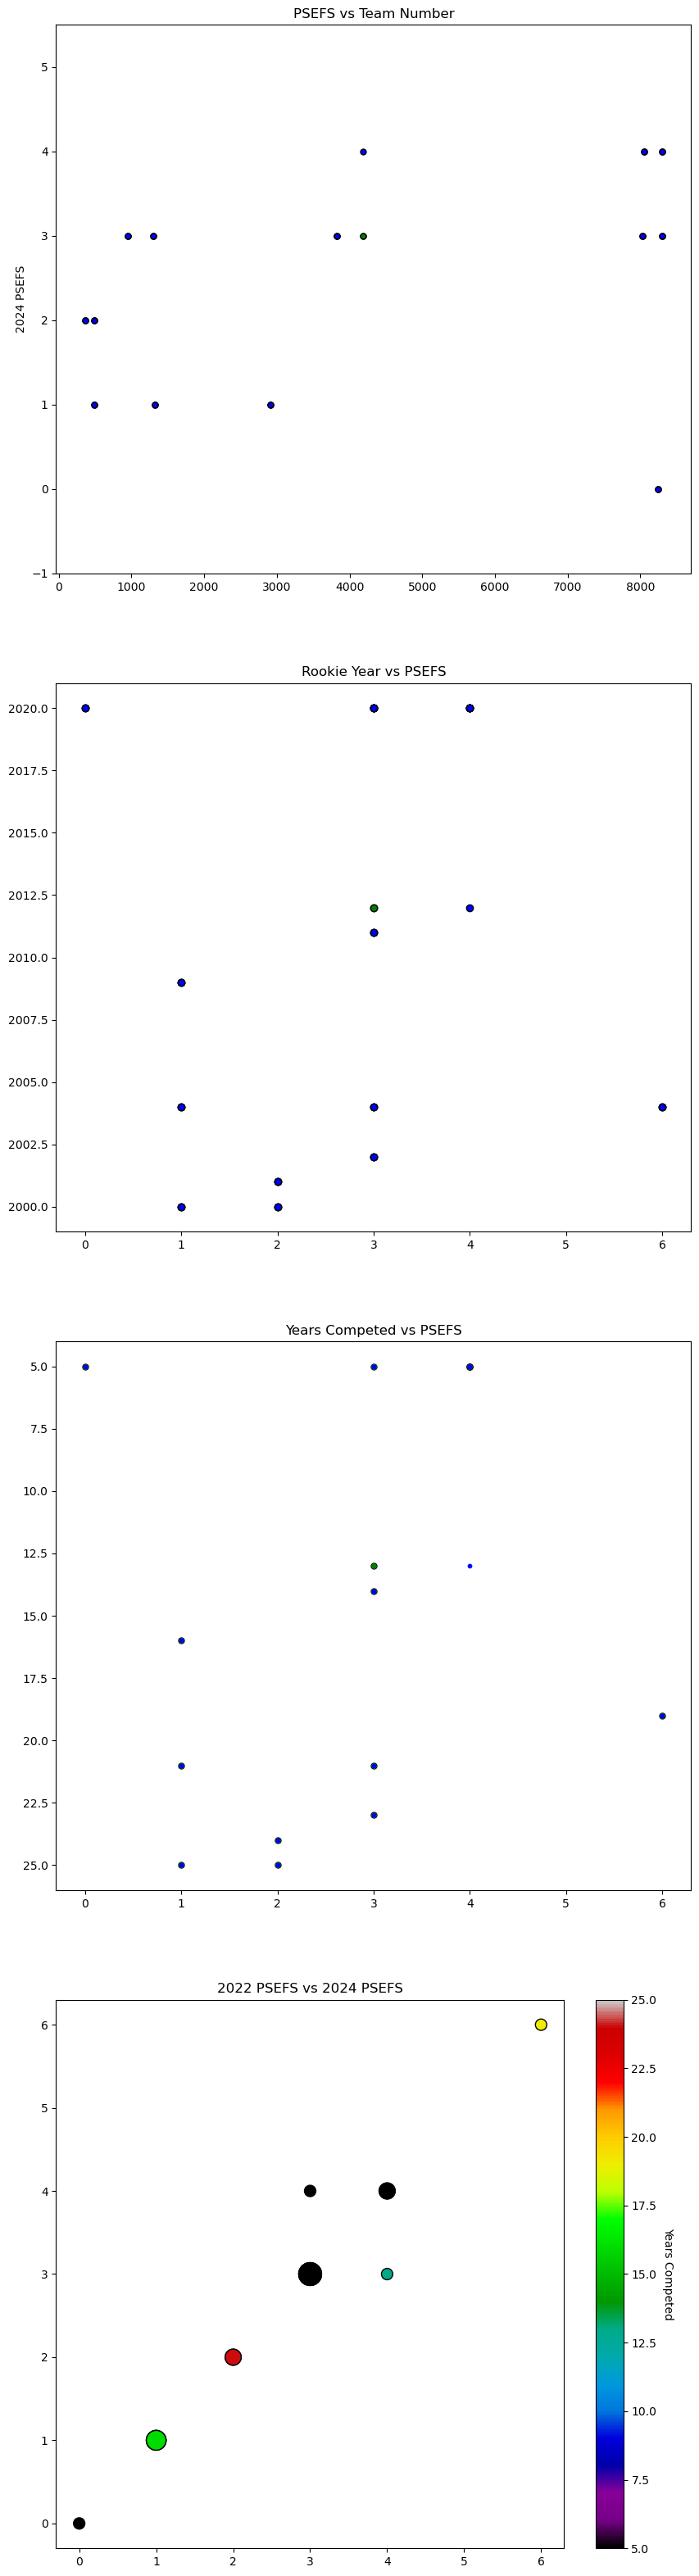

In [9]:
# Create 1x3 subplots
from collections import Counter                                                                                              
                                                                                                
fig, axs = plt.subplots(4, 1, figsize=(10, 40))
# Filter the DataFrame to only include rows where '2024 PSEFS (initial)' is <= 5
filteredDF = masterScoutingDF[masterScoutingDF['2024 PSEFS (initial)'] <=6]
display(filteredDF)
filteredDF = filteredDF[filteredDF['2020 retro-PSEFS'] <=6]
display(filteredDF)
# Then plot using the filtered DataFrame
axs[0].scatter(filteredDF['#'], filteredDF['2022 PSEFS (initial)'], color='r', s =25, edgecolor='black')
axs[0].scatter(filteredDF['#'], filteredDF['2023 PSEFS (initial)'], color='g', s =25, edgecolor='black')
axs[0].scatter(filteredDF['#'], filteredDF['2024 PSEFS (initial)'],  color='b', s =25, edgecolor='black')
#axs[0].set_xlabel('Team Number')
axs[0].set_ylabel('2024 PSEFS')
axs[0].set_ylim(-1,5.5)
axs[0].set_title('PSEFS vs Team Number')

# Plot histogram for 'Species'
axs[1].scatter( filteredDF['2022 PSEFS (initial)'], filteredDF['Rookie Year'], color='r', edgecolor='black')
axs[1].scatter( filteredDF['2023 PSEFS (initial)'], filteredDF['Rookie Year'], color='g', edgecolor='black')
axs[1].scatter( filteredDF['2024 PSEFS (initial)'], filteredDF['Rookie Year'], color='b', edgecolor='black')
axs[1].set_title('Rookie Year vs PSEFS')

# Plot histogram for 'Species'
axs[2].scatter(  filteredDF['2022 PSEFS (initial)'], filteredDF['Years Competed'],color='r',s =25, edgecolor='black')
axs[2].scatter(  filteredDF['2023 PSEFS (initial)'], filteredDF['Years Competed'],color='g',s =15)
axs[2].scatter(  filteredDF['2024 PSEFS (initial)'], filteredDF['Years Competed'],color='b',s =10)
axs[2].invert_yaxis()
axs[2].set_title('Years Competed vs PSEFS')

# Plot histogram for 'Species'
x_data = filteredDF['2024 PSEFS (initial)']
y_data = filteredDF['2022 PSEFS (initial)']
c_data = filteredDF['Years Competed']

# Count occurrences of each (x, y) pair
counter = Counter(zip(x_data, y_data))

# Create sizes array based on occurrences
sizes = [100 * counter[(x, y)] for x, y in zip(x_data, y_data)]

# Scatter plot with sizes
sc = axs[3].scatter(x_data, y_data, c=c_data, cmap='nipy_spectral', s=sizes, edgecolor='black')

# Add colorbar
cbar = plt.colorbar(sc, ax=axs[3])
cbar.set_label('Years Competed', rotation=270, labelpad=15)

# Title
axs[3].set_title('2022 PSEFS vs 2024 PSEFS')



In [10]:
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
import pandas as pd  # Assuming you're using pandas for DataFrame

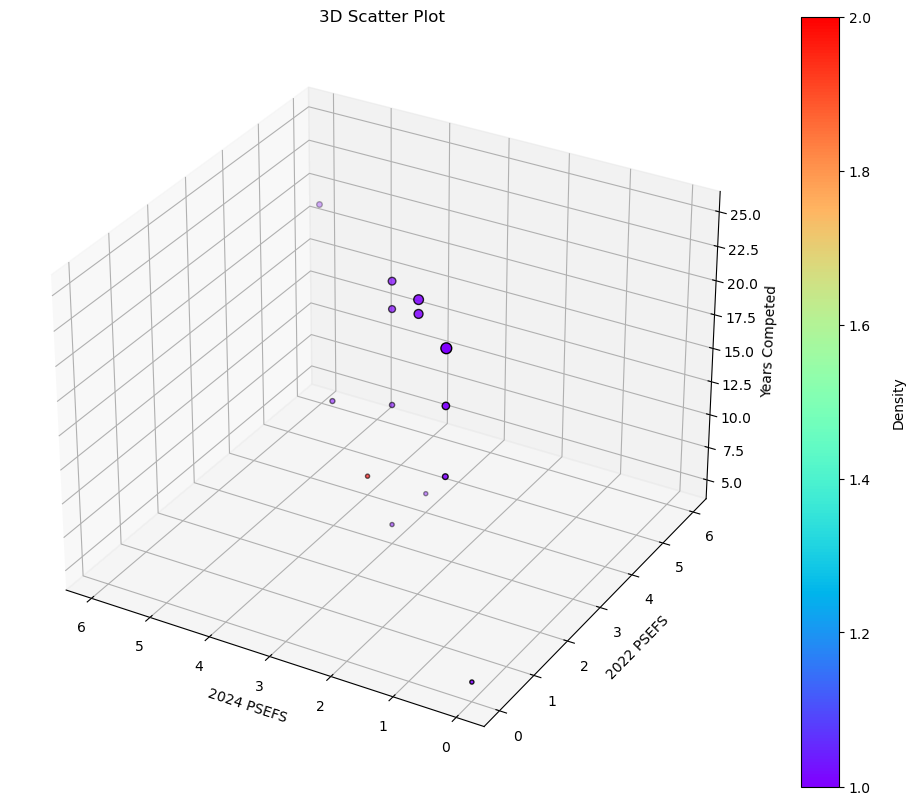

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from collections import Counter

# Create a new standalone figure for 3D subplot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assuming your DataFrame is called filteredDF
x_data = filteredDF['2024 PSEFS (initial)']
y_data = filteredDF['2022 PSEFS (initial)']
z_data = filteredDF['Years Competed']

# Count occurrences for color mapping
counter = Counter(zip(x_data, y_data, z_data))

# Create a color array based on occurrences
colors = [counter[(x, y, z)] for x, y, z in zip(x_data, y_data, z_data)]

# Calculate the distances from the viewpoint (0, 0, 25)
viewer_position = np.array([0, 0, 28])
distances = np.sqrt((x_data - viewer_position[0])**2 + (y_data - viewer_position[1])**2 + (z_data - viewer_position[2])**2)

# Use distances to set point sizes, you might need to adjust the scaling factor
sizes = 200 / distances

# 3D Scatter plot
sc = ax.scatter(x_data, y_data, z_data, c=colors, s=sizes, cmap='rainbow',edgecolor='black')

# Labels and title
ax.set_xlabel('2024 PSEFS')
ax.set_ylabel('2022 PSEFS')
ax.set_zlabel('Years Competed')
ax.set_title('3D Scatter Plot')
ax.invert_xaxis()

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Density', rotation=90, labelpad=15)

plt.show()


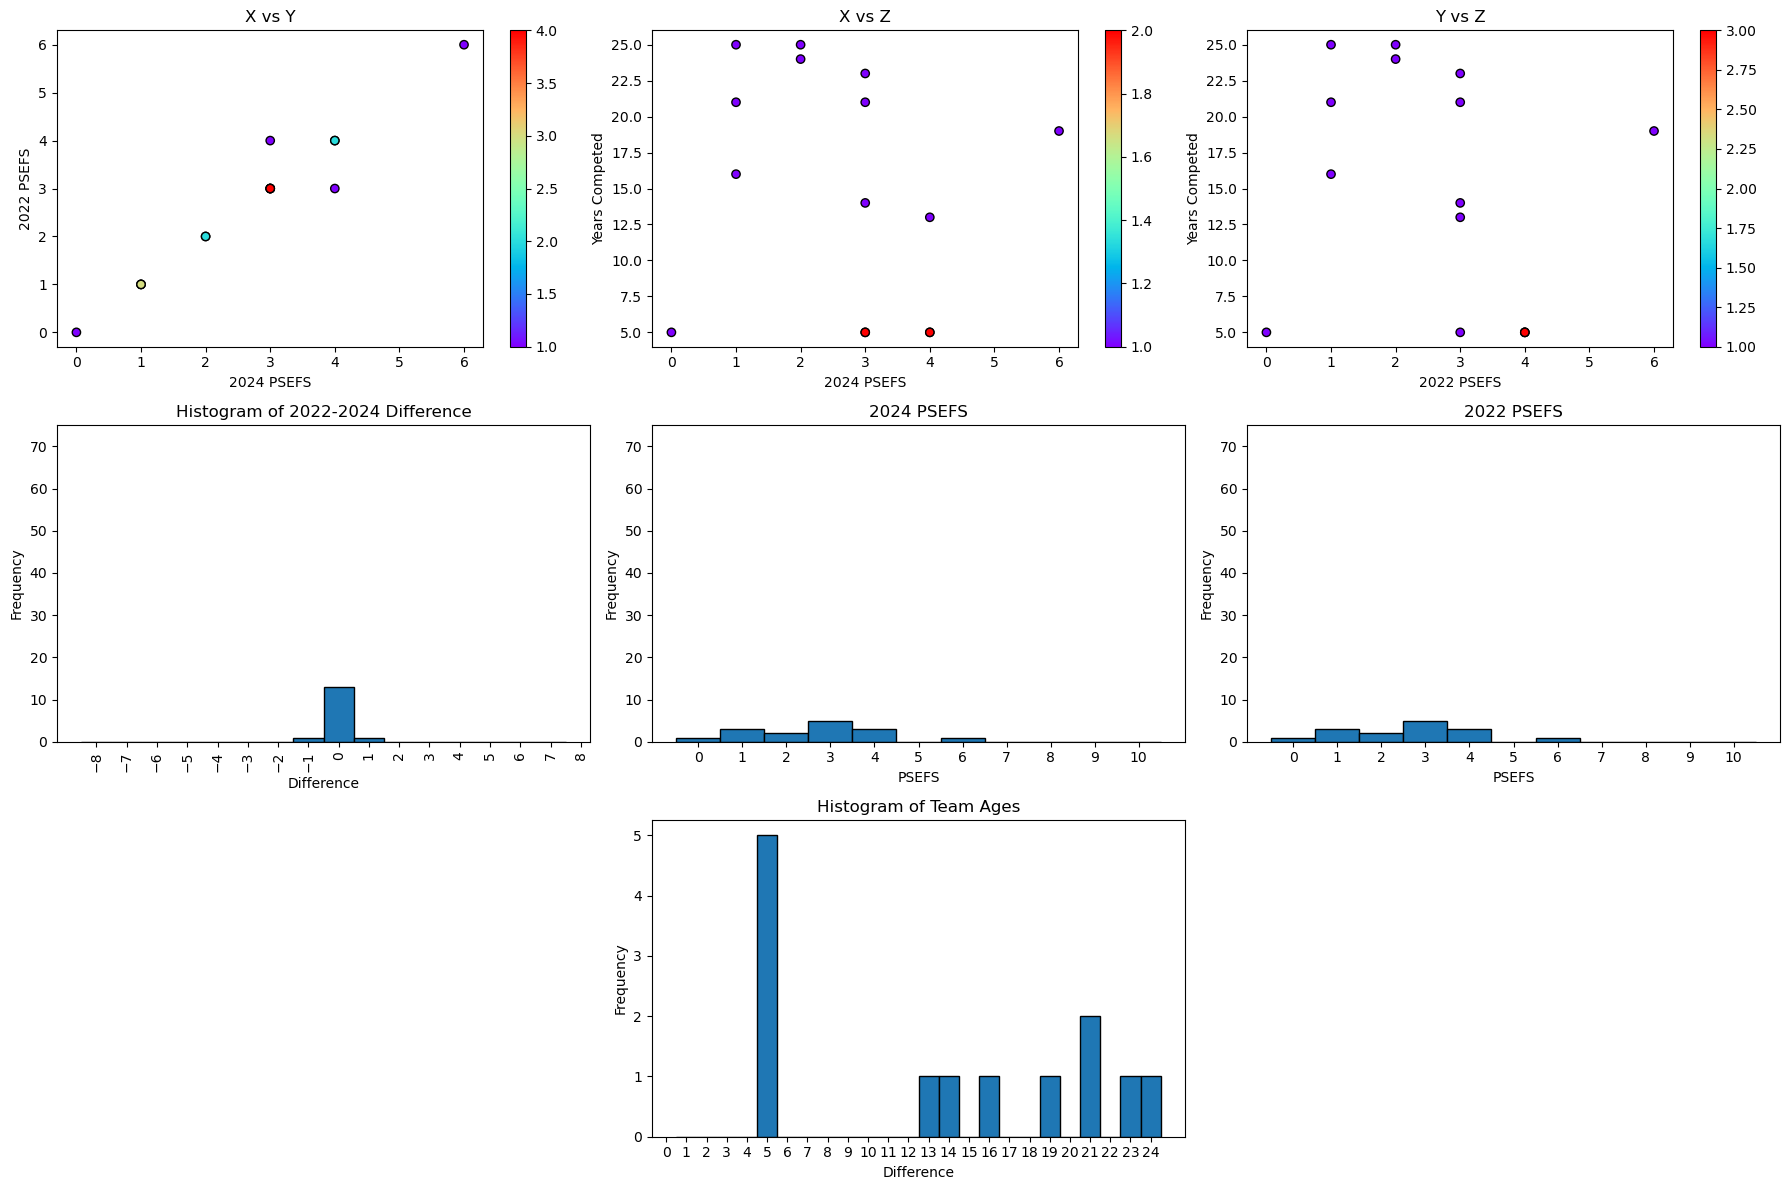

In [12]:
# from collections import Counter

# Create a figure and a grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Assuming your DataFrame is called filteredDF
x_data = filteredDF['2024 PSEFS (initial)']
y_data = filteredDF['2022 PSEFS (initial)']
z_data = filteredDF['Years Competed']

# Count occurrences for color mapping
counter_xy = Counter(zip(x_data, y_data))
counter_xz = Counter(zip(x_data, z_data))
counter_yz = Counter(zip(y_data, z_data))

# Create a color array based on occurrences
colors_xy = [counter_xy[(x, y)] for x, y in zip(x_data, y_data)]
colors_xz = [counter_xz[(x, z)] for x, z in zip(x_data, z_data)]
colors_yz = [counter_yz[(y, z)] for y, z in zip(y_data, z_data)]

# X vs Y
sc = axs[0, 0].scatter(x_data, y_data, c=colors_xy, cmap='rainbow', edgecolor='black')
plt.colorbar(sc, ax=axs[0, 0])
axs[0, 0].set_title('X vs Y')
axs[0, 0].set_xlabel('2024 PSEFS')
axs[0, 0].set_ylabel('2022 PSEFS')

# X vs Z
sc = axs[0, 1].scatter(x_data, z_data, c=colors_xz, cmap='rainbow', edgecolor='black')
plt.colorbar(sc, ax=axs[0, 1])
axs[0, 1].set_title('X vs Z')
axs[0, 1].set_xlabel('2024 PSEFS')
axs[0, 1].set_ylabel('Years Competed')

# Y vs Z
sc = axs[0, 2].scatter(y_data, z_data, c=colors_yz, cmap='rainbow', edgecolor='black')
plt.colorbar(sc, ax=axs[0, 2])
axs[0, 2].set_title('Y vs Z')
axs[0, 2].set_xlabel('2022 PSEFS')
axs[0, 2].set_ylabel('Years Competed')

# Histogram of X-Y difference
bins_edges = [i-0.5 for i in range(-8,9)]
axs[1, 0].hist((x_data - y_data), bins=bins_edges, edgecolor='black')
axs[1, 0].set_title('Histogram of 2022-2024 Difference')
axs[1, 0].set_xticks(range(-8,9))
axs[1, 0].set_ylim(0,75)
axs[1, 0].xaxis.set_tick_params(rotation=90)  # Optional, to rotate the tick labels
axs[1, 0].set_xlabel('Difference')
axs[1, 0].set_ylabel('Frequency')


# Histogram of X
bins_edges = [i-0.5 for i in range(12)]
axs[1, 1].hist(x_data, bins=bins_edges, edgecolor='black')
axs[1, 1].set_title('2024 PSEFS')
axs[1, 1].set_xlabel('PSEFS')
axs[1, 1].set_xticks(range(11))
axs[1, 1].set_ylim(0,75)
axs[1, 1].set_ylabel('Frequency')

# Histogram of 
bins_edges = [i-0.5 for i in range(12)]
axs[1, 2].hist(y_data, bins=bins_edges, edgecolor='black')
axs[1, 2].set_title('2022 PSEFS')
axs[1, 2].set_xlabel('PSEFS')
axs[1, 2].set_ylim(0,75)
axs[1, 2].set_xticks(range(11))
axs[1, 2].set_ylabel('Frequency')

axs[2, 0].axis('off')
axs[2, 2].axis('off')



bins_edges = [i-0.5 for i in range(1,26)]
axs[2, 1].hist(z_data, bins=bins_edges, edgecolor='black')
axs[2, 1].set_xticks(range(25))
axs[2, 1].set_title('Histogram of Team Ages')
axs[2, 1].set_xlabel('Difference')
axs[2, 1].set_ylabel('Frequency')



plt.tight_layout()
plt.show()


In [ ]:
import requests
import pymc3 as pm
import numpy as np
import pandas as pd

# Set up the API request
event_key = '2023wasno'
match_type = 'qualification'
api_key = '2dZKrdov7pGW7HW3kA7Ib8MXa6je84N8ecaqhk3dbFK0SACi27TS8XLU4P5U6GPf'
url = f'https://www.thebluealliance.com/api/v3/event/{event_key}/matches/simple'

# Retrieve the match data from the API
headers = {'X-TBA-Auth-Key': api_key}
params = {'match_type': match_type}
response = requests.get(url, headers=headers, params=params)
matches = response.json()

# Extract the relevant data from the matches
team_nums = []
scores = []
for match in matches:
    red_alliance = match['alliances']['red']
    blue_alliance = match['alliances']['blue']
    if 'frc8248' in red_alliance['team_keys']:
        # Our team was on the red alliance
        team_nums.append([int(team[3:]) for team in red_alliance['team_keys']])
        scores.append([red_alliance['score'], blue_alliance['score']])
    elif 'frc8248' in blue_alliance['team_keys']:
        # Our team was on the blue alliance
        team_nums.append([int(team[3:]) for team in blue_alliance['team_keys']])
        scores.append([blue_alliance['score'], red_alliance['score']])

team_nums = np.array(team_nums)
scores = np.array(scores)